# Import and Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
!pip install better_profanity
from better_profanity import profanity

In [ ]:
from nltk.corpus import wordnet
import string

nltk.download("averaged_perceptron_tagger")
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#improt and create count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!pip install --upgrade gensim --force-reinstall


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [ ]:
import gensim
from gensim.models import KeyedVectors

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Ensure required NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Collection and Cleaning


In [ ]:
# load reddit data into dataframe
df = pd.read_csv("reddit_40.csv", skiprows=range(1,50000), nrows=2000)

df = df.drop("controversiality", axis=1)
df = df.drop("score", axis=1)
df

,subreddit,body
0,unpopularopinion,Hi! your post has been removed because it is l...
1,AmItheAsshole,"It's a sex toy, it is the correct comparison."
2,politics,[Innuendo Studios - The Alt-Right Playbook: Th...
3,AskReddit,"No way, life is too short to live somewhere mi..."
4,gameofthrones,**Spoiler Warning:** All officially-released s...
...,...,...
1995,pics,that is the most relaxed guard position Ive ev...
1996,AmItheAsshole,"When it comes to women's health and sexuality,..."
1997,MortalKombat,That’s what she always seemed like to me and I...
1998,AskReddit,Went trick or treating until I learned how to ...


In [ ]:
# get rid of all non-english text (row)

def is_mostly_english(text):
    return sum(1 for c in text if ord(c) < 128) / len(text) > 0.9  # 90% ASCII

df = df[df["body"].apply(lambda x: isinstance(x, str) and is_mostly_english(x))]
df

,subreddit,body
0,unpopularopinion,Hi! your post has been removed because it is l...
1,AmItheAsshole,"It's a sex toy, it is the correct comparison."
2,politics,[Innuendo Studios - The Alt-Right Playbook: Th...
3,AskReddit,"No way, life is too short to live somewhere mi..."
4,gameofthrones,**Spoiler Warning:** All officially-released s...
...,...,...
1995,pics,that is the most relaxed guard position Ive ev...
1996,AmItheAsshole,"When it comes to women's health and sexuality,..."
1997,MortalKombat,That’s what she always seemed like to me and I...
1998,AskReddit,Went trick or treating until I learned how to ...


In [ ]:
import re

#get rid of URLs
df["body"] = df["body"].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))

<ipython-input-12-c35f4a37c7a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["body"] = df["body"].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))


In [ ]:
# Remove special characters and excess whitespace
df["body"] = df["body"].apply(lambda x: re.sub(r"[^A-Za-z0-9.,!?'\s]", "", x))  # Keep only letters, numbers, and some punctuation
df["body"] = df["body"].apply(lambda x: " ".join(x.split()))  # Remove extra spaces

<ipython-input-13-e9a352c61d7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["body"] = df["body"].apply(lambda x: re.sub(r"[^A-Za-z0-9.,!?'\s]", "", x))  # Keep only letters, numbers, and some punctuation
<ipython-input-13-e9a352c61d7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["body"] = df["body"].apply(lambda x: " ".join(x.split()))  # Remove extra spaces


In [ ]:
# convert to lowercase
df["body"] = df["body"].str.lower()

<ipython-input-14-398167944a3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["body"] = df["body"].str.lower()


In [ ]:
#Remove duplicate comments
df = df.drop_duplicates(subset=["body"])

In [ ]:
# remove rows where comment is missing
df = df.dropna(subset=["body"])

#Exploratory Data Analysis (EDA)


In [ ]:


# Apply the profanity detection
df['profanity_check'] = df['body'].apply(lambda x: 1 if profanity.contains_profanity(x) else 0)

# Check the output
df

,subreddit,body,profanity_check
0,unpopularopinion,hi! your post has been removed because it is l...,0
1,AmItheAsshole,"it's a sex toy, it is the correct comparison.",1
2,politics,innuendo studios the altright playbook the car...,0
3,AskReddit,"no way, life is too short to live somewhere mi...",0
4,gameofthrones,spoiler warning all officiallyreleased show an...,0
...,...,...,...
1995,pics,that is the most relaxed guard position ive ev...,0
1996,AmItheAsshole,"when it comes to women's health and sexuality,...",0
1997,MortalKombat,thats what she always seemed like to me and i ...,0
1998,AskReddit,went trick or treating until i learned how to ...,0


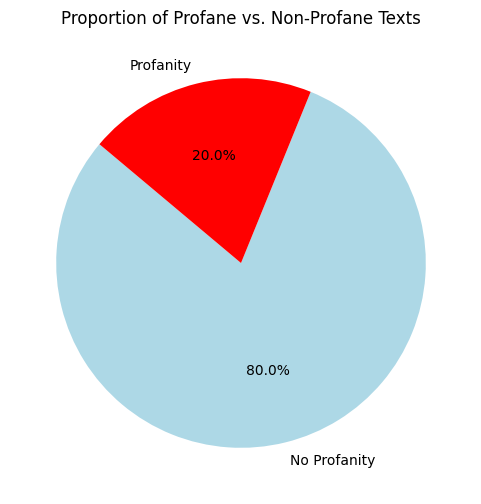

In [ ]:

# Count the number of rows with and without profanity
profanity_counts = df['profanity_check'].value_counts()

# Labels for the pie chart
labels = ['No Profanity', 'Profanity']

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(profanity_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'red'], startangle=140)
plt.title('Proportion of Profane vs. Non-Profane Texts')
plt.show()

<ipython-input-19-3e065b3aafe7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette="Reds")


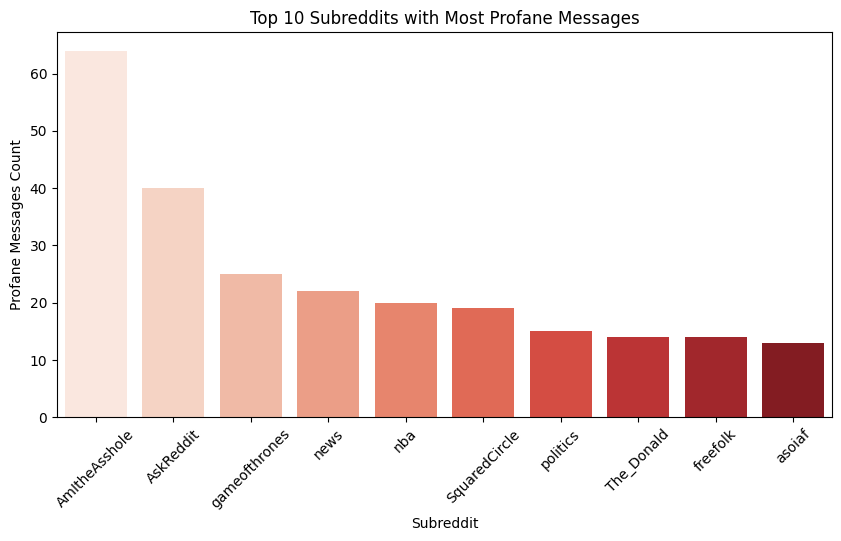

In [ ]:
# Count profanity occurrences by subreddit
subreddit_counts = df.groupby('subreddit')['profanity_check'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette="Reds")
plt.xlabel("Subreddit")
plt.ylabel("Profane Messages Count")
plt.title("Top 10 Subreddits with Most Profane Messages")
plt.xticks(rotation=45)
plt.show()

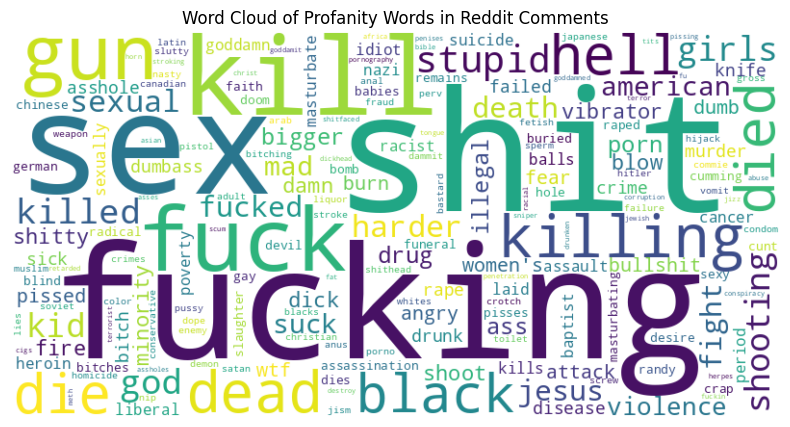

In [ ]:
with open('bad-words.txt', 'r') as f:
   swear_words = [line.strip().lower() for line in f]

def count_profanity(text):
   words = text.split()
   profanity_count = sum(1 for word in words if word in swear_words)
   return profanity_count

df['profanity_count'] = df['body'].apply(count_profanity)

# Count occurrences of each swear word
profanity_counts = Counter()
for text in df['body']:
   for word in text.split():
     if word in swear_words:
       profanity_counts[word]+=1

# Get the 10 most frequent profanity words
most_common_profanity = profanity_counts.most_common(10)

# Extract words and counts for plotting
words, counts = zip(*most_common_profanity)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(profanity_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Profanity Words in Reddit Comments")
plt.show()

# Technique 1: Profanity Censoring


In [ ]:
print(profanity.contains_profanity("This is some crazy shit!"))  # Testing out 1st: should output True
censored_comment = profanity.censor("This is some crazy shit!")
print(censored_comment)

True
This is some crazy ****!


In [ ]:
def contains_profanity(comment):
    return profanity.contains_profanity(comment)

def censor_profanity(comment):
    return profanity.censor(comment)


In [ ]:

df['has_profanity'] = df['body'].apply(contains_profanity) #do the same with the whole file; makes new columns

#df.to_csv("reddit_censored.csv", index=False)

In [ ]:
df['clean_body'] = df['body'].apply(censor_profanity) #do the same with the whole file; makes new columns

In [ ]:
df[df['profanity_check']==1][['body', 'clean_body']]

,body,clean_body
1,"it's a sex toy, it is the correct comparison.","it's a **** toy, it is the correct comparison."
13,"whoever they are, they deserve a goddamn medal.","whoever they are, they deserve a **** medal."
23,they still put entire peoples in what is basic...,they still put entire peoples in what is basic...
41,yeah you dont get a free pass to slaughter inn...,yeah you dont get a free pass to slaughter inn...
48,agreed. nk was killed by arya. its time for jo...,agreed. nk was killed by arya. its time for jo...
...,...,...
1972,im gonna comment as if im seeing just the firs...,im gonna comment as if im seeing just the firs...
1973,you look like zoey101 who took a hit from a me...,you look like zoey101 who took a hit from a **...
1974,lopez aint hitting shit in playoffs.,lopez aint hitting **** in playoffs.
1988,honestly i feel like my answer sucks but it's ...,honestly i feel like my answer sucks but it's ...


In [ ]:
df['results_check'] = df['clean_body'].apply(lambda x: 1 if profanity.contains_profanity(x) else 0)
df[['body', 'clean_body', 'results_check']]


,body,clean_body,results_check
0,hi! your post has been removed because it is l...,hi! your post has been removed because it is l...,0
1,"it's a sex toy, it is the correct comparison.","it's a **** toy, it is the correct comparison.",0
2,innuendo studios the altright playbook the car...,innuendo studios the altright playbook the car...,0
3,"no way, life is too short to live somewhere mi...","no way, life is too short to live somewhere mi...",0
4,spoiler warning all officiallyreleased show an...,spoiler warning all officiallyreleased show an...,0
...,...,...,...
1995,that is the most relaxed guard position ive ev...,that is the most relaxed guard position ive ev...,0
1996,"when it comes to women's health and sexuality,...","when it comes to women's health and sexuality,...",0
1997,thats what she always seemed like to me and i ...,thats what she always seemed like to me and i ...,0
1998,went trick or treating until i learned how to ...,went trick or treating until i learned how to ...,0


In [ ]:
profanity_count = df['results_check'].sum()
print(f"Number of rows with profanity: {profanity_count}")

Number of rows with profanity: 0


# Technique 2: KNN

## Lemmatization

In [ ]:

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):  # Adjectives
        return wordnet.ADJ
    elif tag.startswith('V'):  # Verbs
        return wordnet.VERB
    elif tag.startswith('N'):  # Nouns
        return wordnet.NOUN
    elif tag.startswith('R'):  # Adverbs
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Function to lemmatize text with POS tagging
def lemmatize_text(text):
    if pd.isna(text):  # Handle missing values
        return ""

    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    pos_tags = nltk.pos_tag(tokens)  # Get POS tags

    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return " ".join(lemmatized_words)  # Reconstruct text


# Apply lemmatization to the 'comments' column
df["lemmatized_body"] = df["body"].astype(str).apply(lemmatize_text)


df


,subreddit,body,profanity_check,profanity_count,has_profanity,clean_body,results_check,lemmatized_body
0,unpopularopinion,hi! your post has been removed because it is l...,0,0,False,hi! your post has been removed because it is l...,0,hi your post have be remove because it be low ...
1,AmItheAsshole,"it's a sex toy, it is the correct comparison.",1,1,True,"it's a **** toy, it is the correct comparison.",0,it a sex toy it be the correct comparison
2,politics,innuendo studios the altright playbook the car...,0,0,False,innuendo studios the altright playbook the car...,0,innuendo studios the altright playbook the car...
3,AskReddit,"no way, life is too short to live somewhere mi...",0,0,False,"no way, life is too short to live somewhere mi...",0,no way life be too short to live somewhere mis...
4,gameofthrones,spoiler warning all officiallyreleased show an...,0,0,False,spoiler warning all officiallyreleased show an...,0,spoiler warn all officiallyreleased show and b...
...,...,...,...,...,...,...,...,...
1995,pics,that is the most relaxed guard position ive ev...,0,0,False,that is the most relaxed guard position ive ev...,0,that be the most relaxed guard position ive ev...
1996,AmItheAsshole,"when it comes to women's health and sexuality,...",0,1,False,"when it comes to women's health and sexuality,...",0,when it come to womens health and sexuality ye...
1997,MortalKombat,thats what she always seemed like to me and i ...,0,0,False,thats what she always seemed like to me and i ...,0,thats what she always seem like to me and i ha...
1998,AskReddit,went trick or treating until i learned how to ...,0,0,False,went trick or treating until i learned how to ...,0,go trick or treat until i learn how to drive s...


## Stop Word Removal

In [ ]:

#creates a set of stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words
def remove_stopwords(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    #filters out stopwords and non-letters
    non_stopword_tokens = [token for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(non_stopword_tokens)

# Apply remove stopwords to the 'lemmatized_body' column
df['stopwords_lemmatized_body'] = df['lemmatized_body'].apply(remove_stopwords)
df

,subreddit,body,profanity_check,profanity_count,has_profanity,clean_body,results_check,lemmatized_body,stopwords_lemmatized_body
0,unpopularopinion,hi! your post has been removed because it is l...,0,0,False,hi! your post has been removed because it is l...,0,hi your post have be remove because it be low ...,hi post remove low effort satire discrepancy a...
1,AmItheAsshole,"it's a sex toy, it is the correct comparison.",1,1,True,"it's a **** toy, it is the correct comparison.",0,it a sex toy it be the correct comparison,sex toy correct comparison
2,politics,innuendo studios the altright playbook the car...,0,0,False,innuendo studios the altright playbook the car...,0,innuendo studios the altright playbook the car...,innuendo studios altright playbook card say moops
3,AskReddit,"no way, life is too short to live somewhere mi...",0,0,False,"no way, life is too short to live somewhere mi...",0,no way life be too short to live somewhere mis...,way life short live somewhere miserable
4,gameofthrones,spoiler warning all officiallyreleased show an...,0,0,False,spoiler warning all officiallyreleased show an...,0,spoiler warn all officiallyreleased show and b...,spoiler warn officiallyreleased show book cont...
...,...,...,...,...,...,...,...,...,...
1995,pics,that is the most relaxed guard position ive ev...,0,0,False,that is the most relaxed guard position ive ev...,0,that be the most relaxed guard position ive ev...,relaxed guard position ive ever see
1996,AmItheAsshole,"when it comes to women's health and sexuality,...",0,1,False,"when it comes to women's health and sexuality,...",0,when it come to womens health and sexuality ye...,come womens health sexuality yeah would say me...
1997,MortalKombat,thats what she always seemed like to me and i ...,0,0,False,thats what she always seemed like to me and i ...,0,thats what she always seem like to me and i ha...,thats always seem like hat
1998,AskReddit,went trick or treating until i learned how to ...,0,0,False,went trick or treating until i learned how to ...,0,go trick or treat until i learn how to drive s...,go trick treat learn drive still miss candy


##Bag of Words

In [ ]:

vectorizer = CountVectorizer()

#fits tokens to vocabulary
bow_matrix = vectorizer.fit_transform(df["stopwords_lemmatized_body"])

#converts bow matrix into array for viewing
bow_array = bow_matrix.toarray()
bow_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_array, columns = bow_names)

#displays first rows of bow data f(rame
bow_df.head()

,aa,aarya,aatrox,abandon,abbreviation,abc,ability,able,abomination,abortion,...,yta,ytas,yuck,yup,zero,zettybetty,zjjfbrisinebei,zombie,zone,zoner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##TF-IDF

In [ ]:
#import TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#initalize a tfidf transformer
tfidf_transform = TfidfTransformer()

#apply the transformer to the bow matrix
tfidf_matrix = tfidf_transform.fit_transform(bow_matrix)

#convert the tfidf matrix in a dense array
tfidf_array = tfidf_matrix.toarray()

#create a data frame for viewing
tfidf_df = pd.DataFrame(tfidf_array, columns= bow_names)

#display
tfidf_df.head()

,aa,aarya,aatrox,abandon,abbreviation,abc,ability,able,abomination,abortion,...,yta,ytas,yuck,yup,zero,zettybetty,zjjfbrisinebei,zombie,zone,zoner
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KNN Model

In [ ]:
def knn_profanity_replacement(input_df, k=3):

    profane_sentences = input_df[input_df['has_profanity'] == True]['stopwords_lemmatized_body'].tolist()
    clean_sentences = input_df[input_df['has_profanity'] == False]['stopwords_lemmatized_body'].tolist()

    all_sentences = profane_sentences + clean_sentences

    vectorizer = TfidfVectorizer()
    sentence_vectors = vectorizer.fit_transform(all_sentences)

    profane_vectors = sentence_vectors[:len(profane_sentences)]
    clean_vectors = sentence_vectors[len(profane_sentences):]

    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(clean_vectors)

    nearest_clean_indices = knn.kneighbors(profane_vectors, return_distance=False)

    replaced_sentences = []
    for idx, profane_sentence in enumerate(profane_sentences):
        nearest_clean_sentence = clean_sentences[nearest_clean_indices[idx][0]]

        profane_words = profane_sentence.split()
        clean_words = nearest_clean_sentence.split()

        replaced_sentence = " ".join([
            clean_words[i] if profanity.contains_profanity(word) else word
            for i, word in enumerate(profane_words)
            if i < len(clean_words)
        ])

        replaced_sentences.append(replaced_sentence)

    input_df.loc[input_df['has_profanity'] == True, 'replaced_body'] = replaced_sentences

    return input_df

df = knn_profanity_replacement(df)
df[['body', 'replaced_body']]

,body,replaced_body
0,hi! your post has been removed because it is l...,nan
1,"it's a sex toy, it is the correct comparison.",reverse toy
2,innuendo studios the altright playbook the car...,nan
3,"no way, life is too short to live somewhere mi...",nan
4,spoiler warning all officiallyreleased show an...,nan
...,...,...
1995,that is the most relaxed guard position ive ev...,nan
1996,"when it comes to women's health and sexuality,...",nan
1997,thats what she always seemed like to me and i ...,nan
1998,went trick or treating until i learned how to ...,nan




# Technique 3: Synonym Comparison Replacement

In [ ]:
# Path to the model in Google Drive
model_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)


In [ ]:

# Load pre-trained Word2Vec model (adjust path as needed)
word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Helper function to map POS tags from WordNet to a simpler format
def get_wordnet_pos(word):
    """Map POS tag to the WordNet POS tag."""
    from nltk.corpus import wordnet as wn
    tag = nltk.pos_tag([word])[0][1]
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return None

# Function to get synonyms from WordNet, filtered by POS
def get_synonyms(word):
    synonyms = set()
    wordnet_pos = get_wordnet_pos(word)  # Get POS of the profane word
    for syn in wordnet.synsets(word, pos=wordnet_pos):  # Filter by POS
        for lemma in syn.lemmas():
            if lemma.name().lower() != word.lower():  # Avoid returning the word itself
                synonyms.add(lemma.name().replace("_", " "))
    return list(synonyms)

# Function to get the best non-profane synonym using KNN
def best_synonym(profane_word, censor=True):
    synonyms = get_synonyms(profane_word)

    if not synonyms:
        return "*" * len(profane_word) if censor else "[CENSORED]"  # Replace with asterisks

    # Remove profane synonyms
    synonyms = [word for word in synonyms if not profanity.contains_profanity(word)]

    if not synonyms:
        return "*" * len(profane_word) if censor else "[CENSORED]"  # Replace with asterisks

    # Get word vectors
    word_vectors = []
    valid_synonyms = []

    if profane_word in word2vec_model:
        profane_vector = word2vec_model[profane_word]
    else:
        return "*" * len(profane_word) if censor else "[CENSORED]"  # Replace with asterisks

    for synonym in synonyms:
        if synonym in word2vec_model:
            word_vectors.append(word2vec_model[synonym])
            valid_synonyms.append(synonym)

    if not valid_synonyms:
        return "*" * len(profane_word) if censor else "[CENSORED]"  # Replace with asterisks

    # Convert to NumPy array
    word_vectors = np.array(word_vectors)

    # Use KNN to find the closest synonym
    knn = NearestNeighbors(n_neighbors=1, metric='cosine')
    knn.fit(word_vectors)
    distances, indices = knn.kneighbors([profane_vector])

    return valid_synonyms[indices[0][0]]

# Function to clean text in a DataFrame column
def clean_text(text):
    words = text.split()
    cleaned_words = [best_synonym(word) if profanity.contains_profanity(word) else word for word in words]
    return " ".join(cleaned_words)

# Apply the function to the DataFrame's text column
df["cleaned_body"] = df["body"].astype(str).apply(clean_text)

df[df["profanity_check"] == 1][["body", "cleaned_body"]]

,body,cleaned_body
1,"it's a sex toy, it is the correct comparison.","it's a sexuality toy, it is the correct compar..."
13,"whoever they are, they deserve a goddamn medal.","whoever they are, they deserve a ******* medal."
23,they still put entire peoples in what is basic...,they still put entire peoples in what is basic...
41,yeah you dont get a free pass to slaughter inn...,yeah you dont get a free pass to slaughter inn...
48,agreed. nk was killed by arya. its time for jo...,agreed. nk was killed by arya. its time for jo...
...,...,...
1972,im gonna comment as if im seeing just the firs...,im gonna comment as if im seeing just the firs...
1973,you look like zoey101 who took a hit from a me...,you look like zoey101 who took a hit from a me...
1974,lopez aint hitting shit in playoffs.,lopez aint hitting dogshit in playoffs.
1988,honestly i feel like my answer sucks but it's ...,honestly i feel like my answer sucks but it's ...


In [ ]:
df['results_check'] = df['cleaned_body'].apply(lambda x: 1 if profanity.contains_profanity(x) else 0)

In [ ]:
df[df['profanity_check']== 1][['body', 'profanity_check', 'cleaned_body', 'results_check']]

,body,profanity_check,cleaned_body,results_check
1,"it's a sex toy, it is the correct comparison.",1,"it's a sexuality toy, it is the correct compar...",0
13,"whoever they are, they deserve a goddamn medal.",1,"whoever they are, they deserve a ******* medal.",0
23,they still put entire peoples in what is basic...,1,they still put entire peoples in what is basic...,0
41,yeah you dont get a free pass to slaughter inn...,1,yeah you dont get a free pass to slaughter inn...,0
48,agreed. nk was killed by arya. its time for jo...,1,agreed. nk was killed by arya. its time for jo...,0
...,...,...,...,...
1972,im gonna comment as if im seeing just the firs...,1,im gonna comment as if im seeing just the firs...,0
1973,you look like zoey101 who took a hit from a me...,1,you look like zoey101 who took a hit from a me...,0
1974,lopez aint hitting shit in playoffs.,1,lopez aint hitting dogshit in playoffs.,0
1988,honestly i feel like my answer sucks but it's ...,1,honestly i feel like my answer sucks but it's ...,0


In [ ]:
profanity_count = df['results_check'].sum()
print(f"Number of rows with profanity: {profanity_count}")

Number of rows with profanity: 7
